## Get some basic stats about the Technical Replicates being used in the study

In [1]:
import sys
sys.path.append('..')
import os
from itertools import chain
from collections import defaultdict
import shelve
from tqdm import tqdm
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from adjustText import adjust_text

from scripts import utils
from scripts.analysis import build_loci
from scripts.analysis.DBInfo import DBInfo

BASE = '../data'

db_info = DBInfo("compil_mgm")
metadata = build_loci.read_metadata(os.path.join(BASE,"metadata.csv"))

In [2]:
samples = shelve.open(os.path.join(BASE,"Samples.shelve"))

'\nfor sample_name, sample_info in tqdm(list(metadata.iteritems())):\n    sample = build_loci.Sample(sample_name, sample_info.path, db_info, sample_info)\n    samples[sample.sample_name] = sample\n'

In [3]:
protein_clusters = shelve.open(os.path.join(BASE,"Protein_clusters.shelve"))

'\nfor name, sample in tqdm(samples.items()):\n    protein_clusters[name] = sample.build_protein_clusters()\n'

Get the list of N15 quantified, unenriched samples.

In [4]:
unenr_keys = []
for key, sample in samples.items():
    if sample['quant'] and not sample['enriched']:
        unenr_keys.append(key)
unenr_keys = sorted(unenr_keys, key=lambda x: (x.split('_')[2], x.split('_')[-1], x.split('_')[-2]=='N'))

In [5]:
rt_un_keys = [key for key in unenr_keys if not '_N_' in key]
rag_un_keys = [key for key in unenr_keys if '_N_' in key]

In [6]:
met1 = pd.read_csv(os.path.join(BASE, 'filt_metadata.csv'), index_col=0)

## Plot venn diagrams showing run to run cluster composition for the samples

In [7]:
grpd = met1.query('~enriched').groupby('col_date')
col_dates = [a for a, b in grpd]
col_dates

['11/11/15', '11/21/15', '2015-11-18 2015-11-22']

In [8]:
col_samps = dict()
for date in col_dates:
    col_samps[date] = met1.query('col_date == "{}" and ~enriched'.format(date)).index.tolist()
    

In [9]:
col_samps

{'11/11/15': ['UL_Mix_1111_1',
  'UL_Mix_1111_2',
  'UL_Mix_1111_3',
  'UL_Mix_1111_N_1',
  'UL_Mix_1111_N_2',
  'UL_Mix_1111_N_3'],
 '11/21/15': ['UL_Mix_1121_1',
  'UL_Mix_1121_2',
  'UL_Mix_1121_3',
  'UL_Mix_1121_4',
  'UL_Mix_1121_N_1',
  'UL_Mix_1121_N_2',
  'UL_Mix_1121_N_3',
  'UL_Mix_1121_N_4'],
 '2015-11-18 2015-11-22': ['UL_Mix_Pool_1', 'UL_Mix_Pool_N_1']}

/Users/mmayers/projects/n15_mice/venv/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


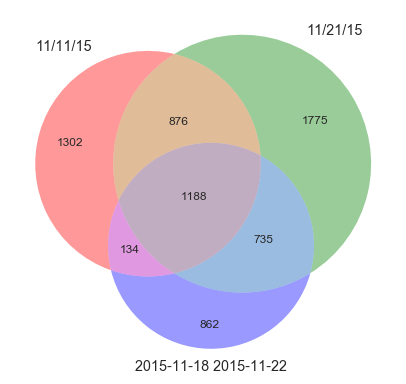

In [10]:
from matplotlib_venn import venn3

peps = defaultdict(set)

for date in col_dates:
    for samp in col_samps[date]:
        peps[date].update(samples[samp].peptides)
venn3([peps[col_dates[0]], peps[col_dates[1]], peps[col_dates[2]]], [col_dates[0], col_dates[1], col_dates[2]])



In [11]:
col_samps[date]

['UL_Mix_Pool_1', 'UL_Mix_Pool_N_1']

/Users/mmayers/projects/n15_mice/venv/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


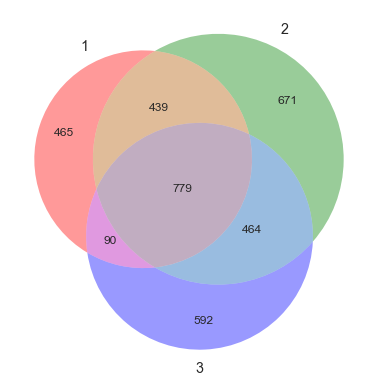

In [12]:
date = col_dates[0]

pep_samps = defaultdict(set)
for samp in col_samps[date]:
    tech = samp[-1]
    pep_samps[tech].update(samples[samp].peptides)
venn3([pep_samps['1'], pep_samps['2'], pep_samps['3']], ['1', '2', '3'])

/Users/mmayers/projects/n15_mice/venv/lib/python3.5/site-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


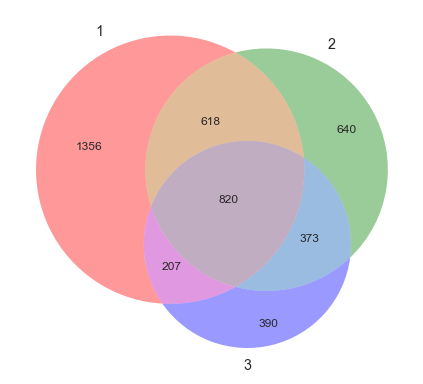

In [13]:
date = col_dates[1]

pep_samps = defaultdict(set)
for samp in col_samps[date]:
    tech = samp[-1]
    pep_samps[tech].update(samples[samp].peptides)
venn3([pep_samps['1'], pep_samps['2'], pep_samps['3']], ['1', '2', '3'])

In [14]:
n14_unenr = met1.query('~enriched and ~n15').index.tolist()
n15_unenr = met1.query('~enriched and n15').index.tolist()
n14_enr = met1.query('enriched and ~n15').index.tolist()
n15_enr = met1.query('enriched and n15').index.tolist()

In [15]:
for samp in n14_unenr:
    print(samp, 'Pepties: ', len(samples[samp].peptides), 'Proteins: ',  len(protein_clusters[samp]))

UL_Mix_1111_1 Pepties:  1591 Proteins:  672
UL_Mix_1111_2 Pepties:  2079 Proteins:  970
UL_Mix_1111_3 Pepties:  1697 Proteins:  823
UL_Mix_1121_1 Pepties:  2682 Proteins:  1427
UL_Mix_1121_2 Pepties:  2194 Proteins:  1197
UL_Mix_1121_3 Pepties:  1609 Proteins:  849
UL_Mix_1121_4 Pepties:  1360 Proteins:  649
UL_Mix_Pool_1 Pepties:  2700 Proteins:  1736


In [16]:
for samp in n15_unenr:
    print(samp, 'Pepties: ', len(samples[samp].peptides), 'Proteins: ',  len(protein_clusters[samp]))

UL_Mix_1111_N_1 Pepties:  1247 Proteins:  596
UL_Mix_1111_N_2 Pepties:  1628 Proteins:  839
UL_Mix_1111_N_3 Pepties:  1311 Proteins:  746
UL_Mix_1121_N_1 Pepties:  1570 Proteins:  953
UL_Mix_1121_N_2 Pepties:  1687 Proteins:  1000
UL_Mix_1121_N_3 Pepties:  1230 Proteins:  698
UL_Mix_1121_N_4 Pepties:  1044 Proteins:  562
UL_Mix_Pool_N_1 Pepties:  1677 Proteins:  1004


In [17]:
for samp in n14_enr:
    print(samp, 'Pepties: ', len(samples[samp].peptides), 'Proteins: ',  len(protein_clusters[samp]))

CL_Mix_Pool_1 Pepties:  3168 Proteins:  1550
CL_Mix_Pool_2 Pepties:  1417 Proteins:  740
CL_Mix_Pool_3 Pepties:  2236 Proteins:  1147
CL_Mix_Pool_4 Pepties:  1831 Proteins:  800
CL_Mix_Pool_5 Pepties:  3000 Proteins:  1568


In [18]:
for samp in n15_enr:
    print(samp, 'Pepties: ', len(samples[samp].peptides), 'Proteins: ',  len(protein_clusters[samp]))

CL_Mix_Pool_N_1 Pepties:  1709 Proteins:  868
CL_Mix_Pool_N_2 Pepties:  948 Proteins:  530
CL_Mix_Pool_N_3 Pepties:  1206 Proteins:  640
CL_Mix_Pool_N_4 Pepties:  934 Proteins:  357
CL_Mix_Pool_N_5 Pepties:  1165 Proteins:  581


In [19]:
import scipy.stats as stats

In [20]:
n14_prot = [len(protein_clusters[samp]) for samp in n14_unenr]
n14_pep = [len(samples[samp].peptides) for samp in n14_unenr]

print('Avergae Prots: ', np.mean(n14_prot), "±", stats.sem(n14_prot))
print('Average Peptides: ', np.mean(n14_pep), "±", stats.sem(n14_pep))

Avergae Prots:  1040.375 ± 135.988961934
Average Peptides:  1989.0 ± 180.257950092


In [21]:
n15_prot = [len(protein_clusters[samp]) for samp in n15_unenr]
n15_pep = [len(samples[samp].peptides) for samp in n15_unenr]

print('Avergae Prots: ', np.mean(n15_prot), "±", stats.sem(n15_prot))
print('Average Peptides: ', np.mean(n15_pep), "±", stats.sem(n15_pep))

Avergae Prots:  799.75 ± 62.4107219497
Average Peptides:  1424.25 ± 86.8335332691


In [22]:
np.mean(n14_prot)/np.mean(n15_prot)

1.3008752735229758

In [23]:
np.mean(n14_pep)/np.mean(n15_pep)

1.39652448657188

In [24]:
n14_prot1 = [len(protein_clusters[samp]) for samp in n14_enr]
n14_pep1 = [len(samples[samp].peptides) for samp in n14_enr]

print('Avergae Prots: ', np.mean(n14_prot1), "±", stats.sem(n14_prot1))
print('Average Peptides: ', np.mean(n14_pep1), "±", stats.sem(n14_pep1))

Avergae Prots:  1161.0 ± 176.738224502
Average Peptides:  2330.4 ± 334.854386264


In [25]:
n15_prot1 = [len(protein_clusters[samp]) for samp in n15_enr]
n15_pep1 = [len(samples[samp].peptides) for samp in n15_enr]

print('Avergae Prots: ', np.mean(n15_prot1), "±", stats.sem(n15_prot1))
print('Average Peptides: ', np.mean(n15_pep1), "±", stats.sem(n15_pep1))

Avergae Prots:  595.2 ± 82.9514315729
Average Peptides:  1192.4 ± 140.412463834


## Do by grouped loci
Grouping loci allows more loci to be picked up, if a 1 peptide is found in n15 sample, then it can be quantified and that sample can be said to potentially that protein as well.

In [26]:
unenr_grouped_loci = utils.load(os.path.join(BASE, 'unenriched_grouped_loci.pkl.gz'))

In [27]:
unenr_prots = defaultdict(set)
unenr_peps = defaultdict(set)
for locus in unenr_grouped_loci:
    for samp, peps in locus.cluster_peptides.items():
        unenr_peps[samp].update(set(peps.keys()))
    for samp in locus.quantification.keys():
        unenr_prots[samp].add(locus.cluster_id)

In [28]:
n14_prot2 = [len(v) for k,v in unenr_prots.items() if k in n14_unenr]
n14_pep2 = [len(v) for k,v in unenr_peps.items() if k in n14_unenr]

print('Avergae Prots: ', np.mean(n14_prot2), "±", stats.sem(n14_prot2))
print('Average Peptides: ', np.mean(n14_pep2), "±", stats.sem(n14_pep2))

Avergae Prots:  1178.375 ± 128.225657325
Average Peptides:  1890.25 ± 174.836122248


In [29]:
n15_prot2 = [len(v) for k,v in unenr_prots.items() if k in n15_unenr]
n15_pep2 = [len(v) for k,v in unenr_peps.items() if k in n15_unenr]

print('Avergae Prots: ', np.mean(n15_prot2), "±", stats.sem(n15_prot2))
print('Average Peptides: ', np.mean(n15_pep2), "±", stats.sem(n15_pep2))

Avergae Prots:  1049.125 ± 100.009006291
Average Peptides:  1349.875 ± 83.8010904932


In [30]:
# Going to do this from grouped loci for the enriched, since many loci are filtered out
# due to being picked up by dmso control
enr_grouped_loci = utils.load(os.path.join(BASE, 'enriched_grouped_loci_filt1.pkl.gz'))

In [31]:
enr_prots = defaultdict(set)
enr_peps = defaultdict(set)
for locus in enr_grouped_loci:
    for samp, peps in locus.cluster_peptides.items():
        enr_peps[samp].update(set(peps.keys()))
    for samp in locus.quantification.keys():
        enr_prots[samp].add(locus.cluster_id)

In [32]:
n14_prot1 = [len(v) for k,v in enr_prots.items() if k in n14_enr]
n14_pep1 = [len(v) for k,v in enr_peps.items() if k in n14_enr]

print('Avergae Prots: ', np.mean(n14_prot1), "±", stats.sem(n14_prot1))
print('Average Peptides: ', np.mean(n14_pep1), "±", stats.sem(n14_pep1))

Avergae Prots:  1088.4 ± 160.226589554
Average Peptides:  1837.2 ± 293.1056806


In [33]:
n15_prot1 = [len(v) for k,v in enr_prots.items() if k in n15_enr]
n15_pep1 = [len(v) for k,v in enr_peps.items() if k in n15_enr]

print('Avergae Prots: ', np.mean(n15_prot1), "±", stats.sem(n15_prot1))
print('Average Peptides: ', np.mean(n15_pep1), "±", stats.sem(n15_pep1))

Avergae Prots:  895.4 ± 114.756524869
Average Peptides:  968.4 ± 128.052176866


## Jaccard Distance Dendrigram

In [34]:
grouped_loci = utils.load(os.path.join(BASE, 'grouped_loci.pkl.gz'))

In [35]:
metadata = pd.read_csv(os.path.join(BASE, 'filt_metadata.csv'), index_col = 0)
metadata['category'] = metadata['category'].str.replace('RT', 'IBD')
metadata['category'] = metadata['category'].str.replace('RAG', 'RAG${}^{-/-}$')


n14_samps = metadata.query('~n15').index.tolist()
n15_samps = metadata.query('n15').index.tolist()

rt_un_keys = metadata.query('~enriched and ~n15').index.tolist()
rag_un_keys = metadata.query('~enriched and n15').index.tolist()

rt_enr_keys = metadata.query('enriched and ~n15').index.tolist()
rag_enr_keys = metadata.query('enriched and n15').index.tolist()

In [36]:
df = build_loci.to_df(grouped_loci, ratios=False, peptides=True)
df = df.replace(np.nan, 0).apply(lambda c: pd.Series.astype(c, 'bool'))
df = df.loc[rt_un_keys+rag_un_keys+rt_enr_keys+rag_enr_keys]
df.index = [metadata.loc[x, 'category']+' '+str(metadata.loc[x, 'technical']) for x in df.index]

In [37]:
import scipy.cluster.hierarchy as hac
z = hac.linkage(df, method = 'average', metric = "jaccard")

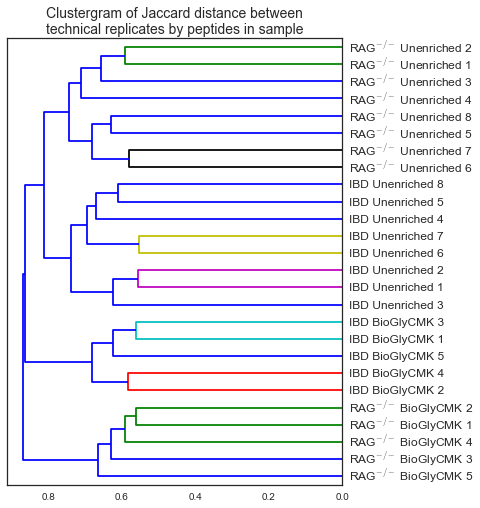

In [38]:
sns.set_style('white')

fig = plt.figure(figsize=(6,8))
fig.set_tight_layout(False)
hac.dendrogram(z ,orientation='left', labels = list(df.index))
plt.title('Clustergram of Jaccard distance between\ntechnical replicates by peptides in sample', size = 14)
plt.yticks(size=12)
plt.savefig(os.path.join(BASE, 'technical_rep_dendrigram.svg'));